<a href="https://colab.research.google.com/github/saadbenda/github_divers/blob/master/DataManipulationChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working Environment

We import below all the packages you should need. However, feel free to import extra packages. **Shall you** need to install some of these packages (ex: **rasterio**), you can access  your shell and install like that: 

```shell
!pip install myPackage
```



```shell
!pip install -e git+https://github.com/scikit-learn/scikit-learn.git
```

In [0]:
# all the imports are here
import warnings
from os import listdir
from os.path import isfile, join

import numpy as np
import rasterio# I used conda install -c conda-forge rasterio
import os
import seaborn as sb

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

# Data Manipulation Challenge description & instructions

In this challenge, you will have to load and manipulate satellite images, as you could be doing if you join Kayrros. Data manipulation is one of the core skills one should master, even before thinking about fancy algorithms and data pipelines. 

You will not be required any image specific knowledge, as we will provide you with the necessary guidelines.

Please keep your code clean and don't forget to comment your code. You are also encouraged to provide as much details as you can in markdown cells or in comments, even if you have ideas you do not have time to explore. We will evaluate the cleanness of your code as much as your results.

Have fun !

# Data loading and data description

## setup

In [0]:
# define the path where the images are located
IMG_PATH = 'data/'

# The functions below will be useful to load tif images as arrays
def rio_open(p):
    """
    Open an image with rasterio.

    Args:
        p: path to the image file

    Returns:
        rasterio dataset
    """
    with warnings.catch_warnings():  # noisy warning may occur here
        warnings.filterwarnings("ignore", category=UserWarning)
        return rasterio.open(p)

def rio_read(p):
    """
    Read an image with rasterio.

    Args:
        p: path to the image file

    Returns:
        numpy array
    """
    with rio_open(p) as x:
        return x.read().transpose((1, 2, 0)).squeeze()

## loading and visualizing your first random satellite image band

Each satellite image is composed of 13 bands, going from visible light to near infrared. 

You will find these bands in the data/ folder, under the format [image\_date]\_[image\_number].tif

The usual RGB images you are used to see (a picture for instance) are made of bands B02 (Blue), B03 (Green) and B04 (Red)

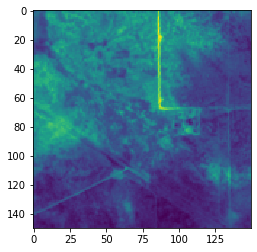

In [0]:
# Here, we show you how to load a given band from a random image and to visualize it
random_image_band = 'data/20170106_B02.tif'
img = rio_read(random_image_band)
plt.imshow(img)

## loading the data set

In this section, you are expected to load the full data set in the following format: **dataset = {img\_date: {'B01': img\_B01_array, ..., 'B12': img\_B12_array}}**, where img\_B0X_array are the image bands as arrays, i.e. the output of the rio_read() function

In [0]:
# Load the dataset under the required format
# WRITE YOUR CODE HERE
def load_dataset(database='data/'):
    dataset={}
    dataset2={}
    files=os.listdir(database)
    for file in files:
        image=rio_read(os.path.join(database,file))
        filesplit=file.strip().split('_')
        date,filename=filesplit[0],str(filesplit[1].split('.')[0])#date year/month/day
        dataset2[filename]=image
        dataset[date]=dataset2
    return dataset

# Sanity check: visualize the 3rd band of the image from 2018/05/31
# WRITE YOUR CODE HERE
dataset=load_dataset()
print(dataset['20180531']['B03'])

[[1830 1816 1876 ... 2505 2388 2356]
 [1884 1821 1876 ... 2541 2491 2405]
 [1926 1822 1897 ... 2578 2535 2445]
 ...
 [2856 2853 2766 ... 2598 2605 2511]
 [2823 2834 2788 ... 2520 2544 2510]
 [2839 2841 2859 ... 2358 2509 2561]]


# Generating a RGB image 

Now we know how to visualize a given satellite image band, we are going to build a function that will allow us to visualize a given satellite image as an RGB image.

A RGB image can be represented as a 3D array, with the dimensions [channel, img_height, img_width] or [img_height, img_width, channel], with channel either B02, B03 or B04

In [0]:
# In order to test your function, you can use the following random image
# We want to display the image under the format RGB, i.e. B04, B03, B02
img = np.array([dataset['20170630']['B04'], dataset['20170630']['B03'], dataset['20170630']['B02']])

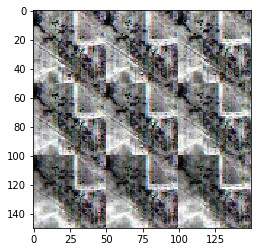

In [0]:
# Build here your function that takes in input a 3D array with B04, B03, B02 bands and returns the final rgb_img ready to be visualized

def generate_rgb_img(img):

    # 1. first, you need to normalize your image. Otherwise you won't be able to visualize it.
    # Normalise your image here


    min_max_scaler=MinMaxScaler(feature_range=(0,255))#use this to scale yur data between 0 and 255
    data3d=[]
    for data2d in img:
        data2d=min_max_scaler.fit_transform(data2d)
        data2d=np.around(data2d)#or rint
        data2d=np.int_(data2d)
        data3d.append(data2d)
    data3d=np.asarray(data3d)

    # 2. the function imshow() allows you to visualise an RGB image, but it needs to be under the format [img_height, img_width, channel_number]
    # It's currently under the format [channel_number, img_height, img_width], so put the image under the good format
    data3d_reshaped=data3d.reshape(data3d.shape[1],data3d.shape[2],data3d.shape[0])

    # display the RGB image
    plt.imshow(data3d_reshaped)
    return data3d_reshaped

# Sanity check: test your function
# WRITE YOUR CODE HERE
image3d=generate_rgb_img(img)

# Detecting patterns in satellite imagery: flaring detection
In this section, we are going to detect some activity happening on the ground, that a human eye might not be able to detect on an the RGB image.

The activity we want to detect is called flaring: it is the process of burning gas, and it is caracterized by an intense heat signature.

We are going to use bands towards infrared to detect heat in the images

'I cannont see flaring'

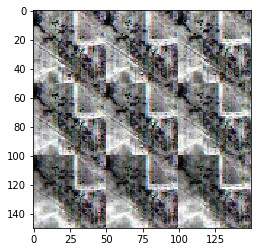

In [0]:
# Load and visualize the RGB image on the 2018/05/31. Can you easily see flaring ?

# WRITE YOUR CODE HERE
img = np.array([dataset['20180531']['B04'], dataset['20180531']['B03'], dataset['20180531']['B02']])
img3d=generate_rgb_img(img)
"""I cannont see flaring"""


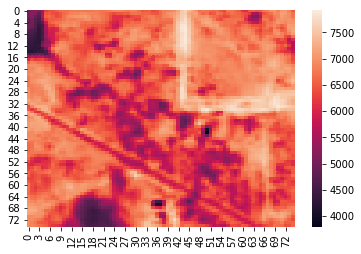

In [0]:
# You can generate a heatmap by simply adding B11 and B12, that is to say: heatmap = B11 + B12
# Below, generate a heatmap of the image and visualize it. You should see a clear signal on the center-right of the image

# WRITE YOUR CODE HERE
sumB11B12=np.add(dataset['20180531']['B11'],dataset['20180531']['B12'])
heatMap=sb.heatmap(sumB11B12)

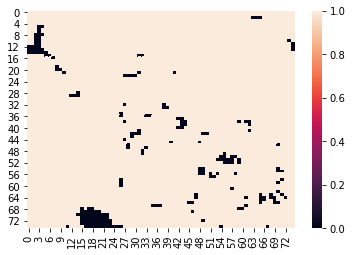

In [0]:
# In order to later detect a flaring activity, it is easier to produce a mask of the flaring activity
# We can consider there is a flaring activity on  a pixel if the value of the pixel is above 15.000
# Generate below a mask of the flaring activity in the previous heatmap (mask: pixel=1 where there is flaring, pixel=0 where there is no flaring)
# Visualize the resulting mask

# WRITE YOUR CODE HERE
mask=np.zeros((sumB11B12.shape[0],sumB11B12.shape[1]))
sumB11B12=min_max_scaler.fit_transform(sumB11B12)
for idx, pixel in np.ndenumerate(sumB11B12):
        if pixel>15.0:
            mask[idx[0],idx[1]] = 1
sb.heatmap(mask, vmin=0,vmax=1)
    

In [0]:
# We consider we should detect a flaring activity in an image if the number of pixels above 15.000 in an image is >= 5.
# Write below a function that returns all the dates for which we should detect a flaring activity in the data we provided

# WRITE YOUR CODE HERE
def flaring_activity(dataset):
    dates=[]
    flares={}
    for date, val in dataset.items():  
        for band,image in val.items():
            count=0
            for _, pixel in np.ndenumerate(image):
                if pixel>15.0:
                    count+=1
                    if count>=5:
                        flares[date+'_'+band]=image
                        break
    return flares

years=set()
flares=flaring_activity(dataset)
for date,image in images.items():
    years.add(date.strip().split('_')[0])
print(years)

{'20180804', '20170526', '20171028', '20180501', '20180302', '20180116', '20180327', '20180720', '20180908', '20180620', '20170923', '20170814', '20170903', '20171122', '20170307', '20190111', '20180903', '20171227', '20180426', '20170725', '20170327', '20171127', '20180610', '20170720', '20180205', '20180531', '20180829', '20181207', '20181222', '20180126', '20190101', '20180715', '20170705', '20180809', '20170630', '20180421', '20170416', '20171013', '20180322', '20181212', '20180625', '20180814', '20180307', '20180215', '20180406', '20180730', '20171008', '20170126', '20180101', '20180210', '20180705', '20180819', '20181217', '20170215', '20170506', '20171207', '20180521', '20170205', '20170106', '20180824', '20170918', '20180121', '20180317', '20180725', '20180605', '20180710', '20171212', '20180312', '20190106', '20171102', '20180615', '20181127', '20180416'}


Question: if you had 1.000 images to process, would you keep the same code structure? What would you change?

In [0]:
# Answer the question here, no need to re-write any code
""""I would directly use the heatmap"""

'"I would directly use the heatmap'

# More fun on data manipulation: zooming in an image on the flaring activity detected

In [0]:
# First, find the center of the flaring activity, that is to say, given all the images for which you detected that there was a flare, 
# combine them to find the center of the flaring in the images time serie
# Your code should return the index of the pixel at the cented of the flaring activity

# WRITE YOUR CODE HERE
def centers():
    for i in years:
        sumimg=np.zeros((125,125))#only take images with shape (125*125)
        centers={}
        for k,v in dataset[i].items():
            if v.shape==(125,125):
                sumimg=np.add(sumimg,v)
        centers[i]=sumimg
    return centers
def find_flare(centers):
    coord={}
    for date, pixel in np.ndenumerate(centers):
        if pixel>15.0:
            coord[date]=pixel.index()
    return coord


In [0]:
# Then, crop the band B02 an image of your choice, centered on the pixel at the center of the flaring activity, and of size 50 x 50
# If the crop is not entirely contained in the image, you can complete the missing pixels of the crop with the value 0
# Do not use any pre-built cropping functions, only numpy arrays manipulation
# Visualize the crop

# WRITE YOUR CODE HERE
def crop_center(img,cropx,cropy,centerx,centery):#say cropx and cropy are the boundaries of the flare and centerx and center y are the coordinates of the flare center
    centerx = centerx-(cropx//2)
    centery = centery-(cropy//2)    
    return img[centerx:centerx+cropx,centery:centery+cropy]
image=dataset['20170106']['B02']
croped=crop_center(image, 50,50,120,150)#say the flare is located in (120,150)
print(croped)

[[2472 2478 2500 ... 2162 2181 2193]
 [2455 2505 2511 ... 2068 2180 2248]
 [2460 2477 2521 ... 2149 2252 2324]
 ...
 [2286 2322 2400 ... 2291 2332 2368]
 [2367 2364 2403 ... 2070 2229 2361]
 [2348 2399 2430 ... 1953 2184 2322]]


In [0]:
# Finally, zoom (expand the size) the previously obtained crop, i.e. produce an image of size 100x100 from the crop of size 50x50
# Do not use any pre-build function
# For this, you will have to create "new" pixels, that you can either interpolate or duplicate from neighbour existing pixels
# Visualize the resulting image

# WRITE YOUR CODE HERE
def zoom(arr,factor):#wich mean the size of the final array is factor*arr.shape
    zoomed=np.kron(arr, np.ones((factor,factor)))#we use the Kronecker product of two arrays.
    return zoomed
print(zoom(croped,2))

[[2202. 2202. 2210. ... 2262. 2109. 2109.]
 [2202. 2202. 2210. ... 2262. 2109. 2109.]
 [2259. 2259. 2343. ... 2057. 2050. 2050.]
 ...
 [2312. 2312. 2416. ... 2109. 2114. 2114.]
 [2284. 2284. 2375. ... 2143. 2156. 2156.]
 [2284. 2284. 2375. ... 2143. 2156. 2156.]]


CONGRATS ! You made it. We hope you had fun, please send back your solution in due time.